# Keras Tutorial: Deep Learning in Python Implementation

Walkthrough of datacamp tutorial of : (https://www.datacamp.com/community/tutorials/deep-learning-python)

## Load the data

In [1]:
import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [2]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Describe and Familiarize your Data

In [4]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
white.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2017,9.0,0.55,0.3,8.1,0.026,14.0,71.0,0.993,2.94,0.36,11.8,5


In [7]:
red.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1146,7.8,0.5,0.12,1.8,0.178,6.0,21.0,0.996,3.28,0.87,9.8,6


In [8]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

sns.set_style("whitegrid")
sns.boxplot(data = white) 

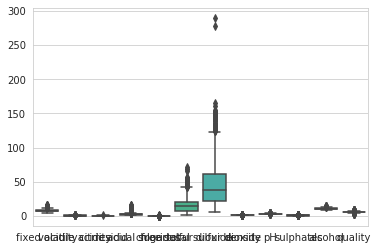

In [11]:
sns.boxplot(data = red) 

## Preprocess Data

In [12]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [13]:
wines.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1182,10.2,0.4,0.4,2.5,0.068,41.0,54.0,0.99754,3.38,0.86,10.5,6,1


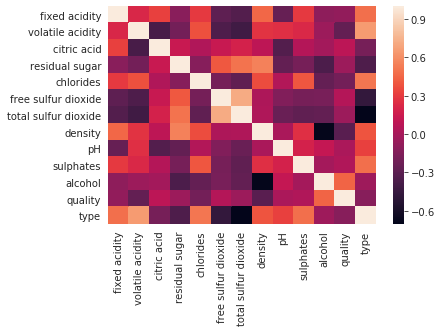

In [14]:
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

# Split Train and Test

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np

# Specify the data 
X=wines.iloc[:,0:-1]  # 12 dimensions

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1700,7.1,0.12,0.32,9.6,0.054,64.0,162.0,0.99620,3.40,0.41,9.4,5
5199,6.8,0.12,0.30,12.9,0.049,32.0,88.0,0.99654,3.20,0.35,9.9,6
3340,7.7,0.38,0.40,2.0,0.038,28.0,152.0,0.99060,3.18,0.32,12.9,6
86,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
5587,6.1,0.20,0.17,1.6,0.048,46.0,129.0,0.99100,3.30,0.43,11.4,6


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4352 entries, 1700 to 860
Data columns (total 12 columns):
fixed acidity           4352 non-null float64
volatile acidity        4352 non-null float64
citric acid             4352 non-null float64
residual sugar          4352 non-null float64
chlorides               4352 non-null float64
free sulfur dioxide     4352 non-null float64
total sulfur dioxide    4352 non-null float64
density                 4352 non-null float64
pH                      4352 non-null float64
sulphates               4352 non-null float64
alcohol                 4352 non-null float64
quality                 4352 non-null int64
dtypes: float64(11), int64(1)
memory usage: 442.0 KB


In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 3103 to 2683
Data columns (total 12 columns):
fixed acidity           2145 non-null float64
volatile acidity        2145 non-null float64
citric acid             2145 non-null float64
residual sugar          2145 non-null float64
chlorides               2145 non-null float64
free sulfur dioxide     2145 non-null float64
total sulfur dioxide    2145 non-null float64
density                 2145 non-null float64
pH                      2145 non-null float64
sulphates               2145 non-null float64
alcohol                 2145 non-null float64
quality                 2145 non-null int64
dtypes: float64(11), int64(1)
memory usage: 217.9 KB


## Standardize The Data

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)  # scaler should be fitted to train only not the entire set

X_test = scaler.transform(X_test)

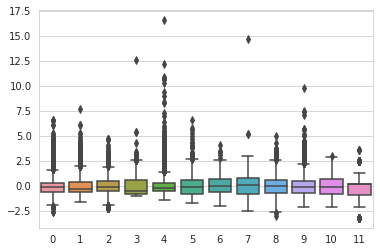

In [20]:
sns.boxplot(data = X_train) 

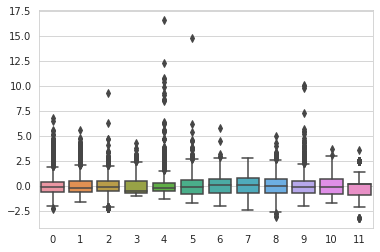

In [21]:
sns.boxplot(data = X_test)

## MLP Data Model

In [22]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(12,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [23]:
X_train.shape

(4352, 12)

In [24]:
model.input_shape

(None, 12)

In [25]:
model.output_shape

(None, 1)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,


In [28]:
model.get_weights()

[array([[ 0.18509841, -0.1787318 , -0.1974895 ,  0.47024655, -0.22014785,
         -0.0336175 , -0.4499972 ,  0.00948608, -0.17663336, -0.13032675,
         -0.20205772,  0.48160243],
        [-0.01900232,  0.01159549,  0.37995243, -0.19818723, -0.10916328,
          0.14702225,  0.03217804, -0.25475132,  0.03949857,  0.42871344,
          0.0091548 , -0.28606224],
        [-0.22698724, -0.00181675,  0.28305113, -0.42118   , -0.4363984 ,
          0.396356  ,  0.34379554, -0.07786012, -0.20018017, -0.22760534,
         -0.41003287, -0.16024351],
        [-0.21674359,  0.13974214,  0.44481695,  0.03168631, -0.41572845,
          0.05836797, -0.40699494, -0.21628869,  0.4499054 , -0.29570246,
         -0.13334882,  0.1724205 ],
        [-0.16441262,  0.2967329 ,  0.33999276, -0.3159808 , -0.22747147,
         -0.24628317,  0.1189853 , -0.00377738,  0.4081782 , -0.08154869,
         -0.404258  , -0.3623103 ],
        [-0.26187372,  0.21067333, -0.10333037,  0.4204389 , -0.08828092,
      

## Training

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train,epochs=20, batch_size=1, validation_data=(X_test, y_test), verbose=1)

Train on 4352 samples, validate on 2145 samples
Epoch 1/20
4352/4352 [==============================] - 19s 4ms/sample - loss: 0.0883 - accuracy: 0.9754 - val_loss: 0.0444 - val_accuracy: 0.9874
Epoch 2/20
4352/4352 [==============================] - 17s 4ms/sample - loss: 0.0241 - accuracy: 0.9947 - val_loss: 0.0325 - val_accuracy: 0.9944
Epoch 3/20
4352/4352 [==============================] - 18s 4ms/sample - loss: 0.0203 - accuracy: 0.9963 - val_loss: 0.0263 - val_accuracy: 0.9949
Epoch 4/20
4352/4352 [==============================] - 17s 4ms/sample - loss: 0.0165 - accuracy: 0.9968 - val_loss: 0.0253 - val_accuracy: 0.9958
Epoch 5/20
4352/4352 [==============================] - 18s 4ms/sample - loss: 0.0147 - accuracy: 0.9975 - val_loss: 0.0223 - val_accuracy: 0.9958
Epoch 6/20
4352/4352 [==============================] - 18s 4ms/sample - loss: 0.0132 - accuracy: 0.9970 - val_loss: 0.0253 - val_accuracy: 0.9958
Epoch 7/20
4352/4352 [==============================] - 18s 4ms/sample

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


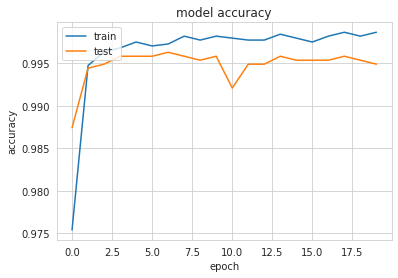

In [30]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluate Model

In [31]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

2145/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [33]:
preds = model.predict(X_test)
print(preds)

In [35]:
preds = np.where(preds > 0.5, 1, 0)
print(preds)

In [40]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot
cmap = matplotlib.cm.get_cmap('Reds')

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    ax = plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

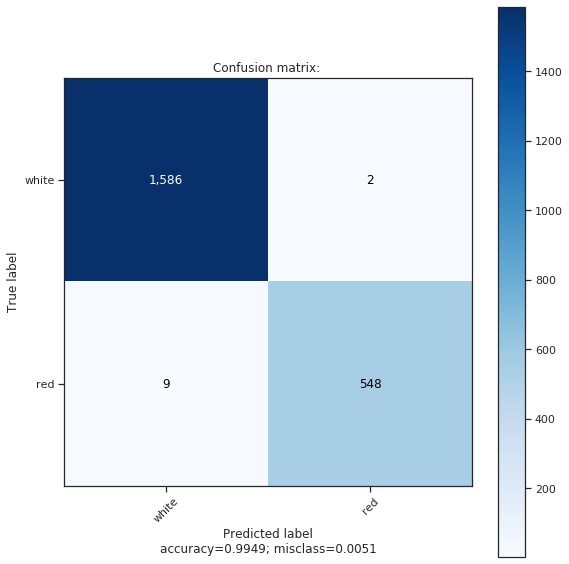

In [41]:
from sklearn.metrics import confusion_matrix

title = 'Confusion matrix: '  
sns.set(style='ticks')
target_names = ['white','red']  # white = 0, red = 1
cm =confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, target_names, title=title, cmap=None, normalize=False)